In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
#import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [2]:
data_set = pd.read_csv('data_set.csv')
data_attr = pd.read_csv('sku_attr_40.csv')
data_info = pd.read_csv('sku_info_40.csv')
data_student = pd.read_csv('student_test.csv')
data_set.head()
data_attr.head()
data_info.head()
data_student.head()

,item_sku_id,dc_id,date,quantity,vendibility,original_price,discount
0,6,4,2017-03-12,0.00,1.00,NaN,NaN
1,6,4,2017-04-29,0.00,1.00,NaN,NaN
2,6,4,2017-09-01,0.00,1.00,NaN,NaN
3,6,4,2017-09-13,0.00,1.00,NaN,NaN
4,6,4,2017-12-01,1.00,1.00,0.01,10.00


,item_sku_id,attr_cd,attr_value_cd
0,1,1,1523
1,1,2,148
2,1,1,1433
3,1,1,1528
4,1,1,1525


,item_sku_id,item_first_cate_cd,item_second_cate_cd,item_third_cate_cd,brand_code
0,1,1,5,366,198
1,2,1,7,298,158
2,3,7,29,144,1040
3,4,7,29,145,70
4,5,1,4,17,707


,serial_number,dc_id,date,quantity,vendibility,original_price,discount
0,0,0,12/23/17,0,0,NaN,NaN
1,1,3,12/30/17,0,1,NaN,NaN
2,2,0,12/18/17,0,0,NaN,NaN
3,3,3,12/18/17,0,0,NaN,NaN
4,4,1,12/25/17,5,0,0.00,2.87


,item_sku_id,dc_id,date,quantity,vendibility,original_price,discount
44200,2,1,2017-10-11,1.00,1.00,0.00,10.00
42736,2,0,2017-02-06,1.00,1.00,0.00,10.00
42735,2,0,2016-05-30,0.00,1.00,NaN,NaN
42734,2,0,2016-05-21,0.00,1.00,NaN,NaN
42733,2,5,2017-09-05,0.00,1.00,NaN,NaN


       item_sku_id  dc_id        date  quantity  vendibility  original_price  \
44200            2      1  2017-10-11      1.00         1.00            0.00   
42736            2      0  2017-02-06      1.00         1.00            0.00   
42735            2      0  2016-05-30      0.00         1.00             NaN   
42734            2      0  2016-05-21      0.00         1.00             NaN   
42733            2      5  2017-09-05      0.00         1.00             NaN   
...            ...    ...         ...       ...          ...             ...   
54698           40      1  2017-08-23      0.00         1.00             NaN   
54697           40      1  2017-07-19      0.00         1.00             NaN   
54696           40      5  2017-09-25      0.00         1.00             NaN   
56582           40      1  2017-05-04      1.00         0.00            0.02   
66795           40      2  2017-10-29      1.00         1.00            0.02   

       discount  
44200     10.00  
427

<AxesSubplot:xlabel='dc_id', ylabel='item_sku_id'>

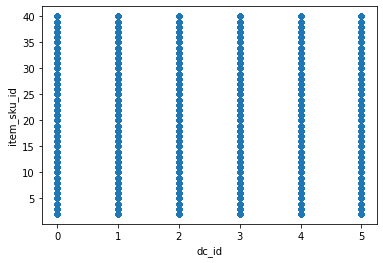

<AxesSubplot:xlabel='date', ylabel='item_sku_id'>

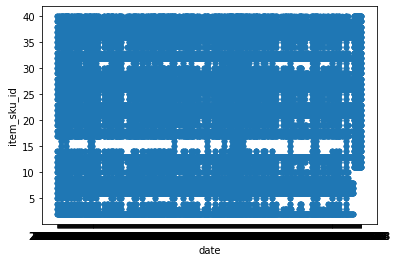

<AxesSubplot:xlabel='quantity', ylabel='item_sku_id'>

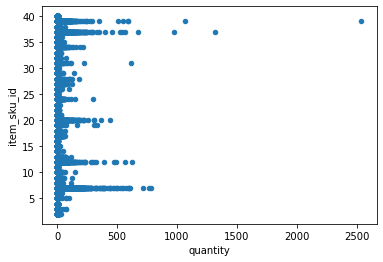

<AxesSubplot:xlabel='vendibility', ylabel='item_sku_id'>

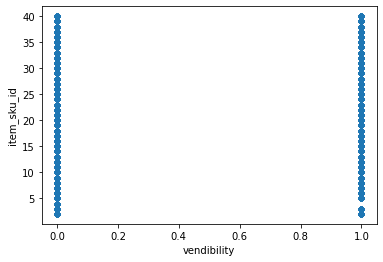

<AxesSubplot:xlabel='original_price', ylabel='item_sku_id'>

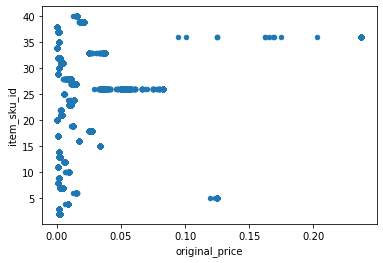

<AxesSubplot:xlabel='discount', ylabel='item_sku_id'>

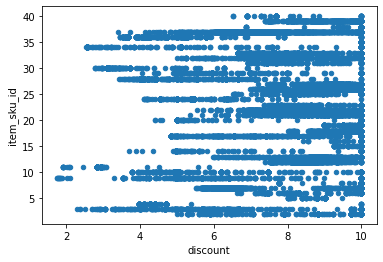

In [3]:
#set_info = pd.merge(data_set,data_info ,on = 'item_sku_id', how='inner')
set_info = data_set
set_info = set_info.sort_values(by = ['item_sku_id'])
set_info.head()
set_info.to_csv('set_info.csv')
print(set_info)
for col in set_info.drop(columns=['item_sku_id']).columns:
    
    set_info.plot(x = col, y = 'item_sku_id', kind = 'scatter')
#df_s.plot(x = 'X1', y = 'Y', kind = 'scatter')
    plt.show()

In [4]:
setinfo = set_info.groupby('item_sku_id')
setinfo.describe().head()


dc_id                                    quantity       ...  \
               count mean  std  min  25%  50%  75%  max    count mean  ...   
item_sku_id                                                            ...   
2           2,793.00 1.96 1.50 0.00 1.00 2.00 3.00 5.00 2,793.00 0.48  ...   
3             890.00 2.47 1.69 0.00 1.00 2.00 4.00 5.00   890.00 1.98  ...   
4             569.00 2.49 1.72 0.00 1.00 3.00 4.00 5.00   569.00 1.12  ...   
5             310.00 2.48 1.70 0.00 1.00 2.00 4.00 5.00   310.00 2.56  ...   
6           2,873.00 1.98 1.47 0.00 1.00 2.00 3.00 5.00 2,873.00 0.41  ...   

            original_price      discount                                       
                       75%  max    count mean  std  min  25%  50%   75%   max  
item_sku_id                                                                    
2                     0.00 0.00   533.00 8.80 1.42 5.00 7.89 9.71 10.00 10.00  
3                     0.00 0.00   447.00 5.97 1.89 2.30 4.66 5.74  6.69 10.00  
4                     0.01 0.01   307.00 4.47 0.87 3.97 4.26 4.26  4.41 10.00  
5                     0.12 0.12   162.00 8.82 0.28 8.00 8.80 9.00  9.00  9.48  
6                     0.01 0.02   477.00 8.66 0.95 6.64 8.21 8.32 10.00 10.00  

[5 rows x 40 columns]

In [5]:
set_sortdate = set_info.sort_values(by = ['date'])
set_sortdate.to_csv('set_sortdate.csv')

In [6]:
set_info.isna().sum()
set_info = set_info.dropna()

#set_info = get_ohe(set_info, 'date')
set_info = set_info.drop(columns = ['date'],axis = 1)
#set_info = get_ohe(set_info, 'dc_id')

item_sku_id           0
dc_id                 0
date                  0
quantity              0
vendibility           0
original_price    34036
discount          34036
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(set_info.drop(columns = ['item_sku_id'],axis = 1),set_info['item_sku_id'], test_size=0.20, stratify = set_info['item_sku_id'], random_state = 2)
X_train
X_test
y_train
y_test

set_info = StandardScaler()
X_train = pd.DataFrame(set_info.fit_transform(X_train), columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(set_info.transform(X_test), columns = X_test.columns, index=X_test.index)

,dc_id,quantity,vendibility,original_price,discount
10909,0,19.00,1.00,0.01,9.35
24175,1,1.00,1.00,0.00,8.94
40030,4,43.00,1.00,0.00,6.80
59341,0,29.00,1.00,0.00,5.53
29624,0,6.00,1.00,0.01,9.31
...,...,...,...,...,...
65603,2,1.00,1.00,0.00,10.00
50176,4,10.00,1.00,0.02,8.82
47888,2,1.00,1.00,0.01,10.00
70926,4,3.00,0.00,0.00,10.00


,dc_id,quantity,vendibility,original_price,discount
49047,2,2.00,1.00,0.24,5.26
12134,2,2.00,1.00,0.00,10.00
33471,5,1.00,1.00,0.00,10.00
63188,0,17.00,1.00,0.00,8.68
3986,1,1.00,1.00,0.01,10.00
...,...,...,...,...,...
23973,2,1.00,1.00,0.00,10.00
2952,2,1.00,1.00,0.01,10.00
26791,5,10.00,1.00,0.02,9.02
41492,1,1.00,1.00,0.01,10.00


10909    27
24175    32
40030     7
59341     9
29624    27
         ..
65603     3
50176    39
47888     6
70926    37
62926     7
Name: item_sku_id, Length: 30097, dtype: int64

49047    36
12134    22
33471    21
63188    13
3986     23
         ..
23973    34
2952     23
26791    39
41492    27
9328     19
Name: item_sku_id, Length: 7525, dtype: int64

In [8]:
model1 = LinearRegression(fit_intercept = True)
model1.fit(X_train, y_train)

#model1.score(X_test, y_test)
model1.score(X_train, y_train)
model1.coef_
model1.intercept_

model3 = GradientBoostingRegressor(random_state=2, min_samples_split = 5, min_samples_leaf = 3)
model3 = model3.fit(X_train, y_train)
model3.score(X_train, y_train)
model3.score(X_test, y_test)

model4 = RandomForestClassifier(random_state=2, min_samples_split = 5, min_samples_leaf = 3)
model4 = model4.fit(X_train, y_train)
model4.score(X_train, y_train)
model4.score(X_test, y_test)

LinearRegression()

0.07373274687852927

array([-0.02712317, -0.50956072,  0.75133806,  2.84053205,  0.43903854])

22.547031265574642

0.8946526003970681

0.8936253597786614

0.9906635212811908

0.9774086378737542

In [15]:
test_output4 = pd.DataFrame(model4.predict(X_test), index = X_test.index, columns = ['predict sku'])
test_output4.head()

test_output4 = test_output4.merge(y_test, left_index = True, right_index = True)
test_output4.head()

,predict sku
49047,36
12134,22
33471,21
63188,13
3986,23


,predict sku,item_sku_id
49047,36,36
12134,22,22
33471,21,21
63188,13,13
3986,23,23


In [10]:
data_student = data_student.dropna()
data_student = data_student.drop(columns = ['date','serial_number'], axis = 1)
pred_output = pd.DataFrame(model3.predict(data_student), index = data_student.index, columns = ['predict sku'])
pred_output.head()

,predict sku
4,37.46
5,37.66
9,37.66
11,37.66
13,37.66


In [11]:
pred_output.to_csv('pred_output.csv')

In [12]:
#print(data_set[1]) data student
data1 = pd.read_csv('student_test.csv', index_col = 0)
print(data1)

               dc_id      date  quantity  vendibility  original_price  \
serial_number                                                           
0                  0  12/23/17         0            0             NaN   
1                  3  12/30/17         0            1             NaN   
2                  0  12/18/17         0            0             NaN   
3                  3  12/18/17         0            0             NaN   
4                  1  12/25/17         5            0            0.00   
...              ...       ...       ...          ...             ...   
859                2  12/26/17         1            0            0.00   
860                5  12/21/17         0            1             NaN   
861                1  12/26/17         3            1            0.01   
862                3  12/19/17       131            1            0.00   
863                4  12/30/17         5            1            0.01   

               discount  
serial_number           

In [14]:
sc = StandardScaler()
data_student = pd.read_csv('student_test.csv')
data_student = data_student.dropna()
data_student = data_student.drop(columns = ['date','serial_number'], axis = 1)
for ind in data_student.index:
    if True:#data_student['discount'].isna().any():
        pred_item = {
            'dc_id':[data_student['dc_id'][ind]],
            'quantity':[data_student['quantity'][ind]],
            'vendibility':data_student['vendibility'][ind],
            'original_price':data_student['original_price'][ind],
            'discount':data_student['discount'][ind]
        }
        pred_item = pd.DataFrame(pred_item)
        #sc.fit(pred_item)
        #pred_item = sc.transform(pred_item)
        #pred_item = pd.DataFrame(sc.transform(pred_item), columns = pred_item.columns)
        #pred_item['dc_id'] = data_student['dc_id'][ind]
        #pred_item['quantity'] = data_student['quantity'][ind]
        #pred_item['vendibility'] = data_student['vendibility'][ind]
    else:
        pred_item['dc_id'] = data_student['dc_id'][ind]
        pred_item['quantity'] = data_student['quantity'][ind]
        pred_item['vendibility'] = data_student['vendibility'][ind]
        pred_item['original_price'] = data_student['original_price'][ind]
        pred_item['discount'] = data_student['discount'][ind]
    model4.predict(pred_item)
    print(pred_item)
        

array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         5            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            0            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1        10            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2        13            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         9            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         5            0            0.12      8.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       351            1            0.00      6.48


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        60            1            0.00      6.50


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1        26            0            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        91            1            0.00      6.01


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.00      5.68


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         5            1            0.00      2.84


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.11      9.55


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2        22            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         9            0            0.00      2.90


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5       173            1            0.00      6.75


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       144            1            0.00      6.75


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        89            1            0.00      6.11


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.00      2.82


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       162            1            0.00      6.11


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        95            1            0.00      6.43


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       147            1            0.00      6.97


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        64            1            0.00      6.71


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         3            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.12      8.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        73            1            0.00      6.07


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.01     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.00      5.92


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         4            0            0.12      8.75


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         6            0            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       131            1            0.00      6.06


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1        89            1            0.00      6.13


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        46            1            0.00      6.84


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        57            1            0.00      6.74


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       123            1            0.00      6.44


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3       127            1            0.00      6.05


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        12            1            0.12      8.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         8            0            0.00      3.40


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.00      3.38


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       223            1            0.00      6.15


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        78            1            0.00      6.55


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       158            1            0.00      6.60


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        64            1            0.00      6.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        99            1            0.00      7.07


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2        10            1            0.00      5.68


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         8            1            0.00      3.21


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       138            1            0.00      6.08


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       142            1            0.00      7.37


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         5            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         8            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        35            1            0.00      6.37


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        77            1            0.00      6.06


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        11            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       100            1            0.00      6.36


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         8            1            0.00      8.49


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         4            0            0.01      5.83


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.00      4.96


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2        15            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         4            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         7            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.00      5.20


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       160            1            0.00      6.30


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2        13            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         5            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.00      3.07


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         9            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        52            1            0.00      6.68


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4       122            1            0.00      6.52


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         5            0            0.00      2.59


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        46            1            0.00      6.43


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        35            1            0.00      6.96


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        67            1            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.11      9.56


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         7            1            0.12      8.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.00      5.74


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       130            1            0.00      6.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       174            1            0.00      6.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.00      5.79


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        53            1            0.00      6.58


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         5            1            0.00      2.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        10            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         7            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       158            1            0.00      6.34


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       129            1            0.00      6.07


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        44            1            0.00      8.09


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         5            1            0.00      2.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       228            1            0.00      6.90


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       177            1            0.00      6.19


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         4            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         3            1            0.01     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         8            1            0.00      3.25


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        51            1            0.00      7.15


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         4            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         9            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         7            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       138            1            0.00      6.44


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       151            1            0.00      6.77


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        44            1            0.00      7.08


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        86            1            0.00      6.25


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         2            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       144            1            0.00      6.14


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         9            0            0.12      8.91


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        13            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         4            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         9            1            0.00      2.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.00      4.96


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        73            1            0.00      6.36


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        15            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2        96            1            0.00      7.18


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       159            1            0.00      6.82


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         5            0            0.00      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       161            1            0.00      6.98


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       875            1            0.00      6.43


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        10            1            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        59            1            0.00      6.60


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       109            1            0.00      6.14


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         7            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        62            1            0.00      7.18


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        63            1            0.00      6.56


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.00      2.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        43            1            0.00      6.36


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         5            1            0.00      2.91


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       110            1            0.00      6.01


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         5            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        61            1            0.00      6.85


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0      2430            1            0.00      6.51


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       153            1            0.00      6.23


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        89            1            0.00      6.05


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       166            1            0.00      6.46


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00      2.84


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.00      5.74


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.00      6.05


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         5            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         6            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4       156            1            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        57            1            0.00      6.25


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1        92            1            0.00      6.47


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        12            1            0.00      3.11


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1        95            1            0.00      6.02


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        55            1            0.00      6.11


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         8            1            0.00      3.97


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        16            1            0.00      3.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.00      5.07


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        66            1            0.00      6.78


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       151            1            0.00      6.44


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.00      2.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       109            1            0.00      6.20


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1        61            1            0.00      6.38


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        10            1            0.01      5.20


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.00      3.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         2            0            0.12      9.35


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4       207            1            0.00      6.51


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         4            0            0.00      3.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        13            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       168            1            0.00      6.24


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       154            1            0.00      6.16


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        79            1            0.00      6.62


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         6            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            1            0.00      7.89


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4       133            1            0.00      6.02


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.00      4.96


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        70            1            0.00      6.05


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        13            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         4            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         7            0            0.01      4.49


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       225            1            0.00      6.14


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        81            1            0.00      6.14


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         3            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       161            1            0.00      6.46


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         4            0            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         8            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         0            0            0.01     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        78            1            0.00      6.23


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         5            0            0.01      5.49


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            0            0.00      2.87


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       175            1            0.00      7.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        15            1            0.00      3.45


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       119            1            0.00      6.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        77            1            0.00      6.40


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         4            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       121            1            0.00      6.48


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         4            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         4            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         7            1            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.00      2.84


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         5            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         1            0            0.11     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0        10            1            0.00      2.84


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       139            1            0.00      7.18


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         4            0            0.12      8.75


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       109            1            0.00      6.38


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         6            1            0.00      2.93


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5         1            0            0.00      5.74


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            1            0.00      5.79


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4        87            1            0.00      6.62


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0       156            1            0.00      6.85


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         2            0            0.00      2.70


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         3            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            1            0.01      8.39


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         6            0            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3       163            1            0.00      6.51


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         2            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         5            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      0         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         3            0            0.00      2.93


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2       155            1            0.00      7.82


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      5        57            1            0.00      6.03


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3        33            1            0.00      6.68


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         4            1            0.12      9.16


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.01      4.12


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         1            0            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         2            1            0.12      8.80


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.01      8.32


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1       107            1            0.00      6.04


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3         0            1            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      2         1            0            0.00     10.00


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      1         3            1            0.01      4.94


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      3       131            1            0.00      6.14


array([39])

   dc_id  quantity  vendibility  original_price  discount
0      4         5            1            0.01      4.94
